In [1]:
import pandas as pd
import numpy as np
import random as rnd
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")
import shap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datetime = pd.read_csv(r"D:\Le Hieu\Data Science\ekyc daytime.csv",parse_dates = ['Created'])
datetime['Created'] = pd.to_datetime(datetime['Created'],format ="%Y-%m-%d %H:%M:%S")
datetime

,Created,day,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,...,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
0,2020-11-30 18:21:00,2020-11-30,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online/,https://invest.vcsc.com.vn/mo-tai-khoan-online/,...,False,False,NaN,NaN,52148ac2,True,MY,Phone,Safari,Ios
1,2020-11-30 17:26:28,2020-11-30,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,971d971a,True,VN,Phone,Chrome,Android
2,2020-11-30 17:34:05,2020-11-30,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,9f14dbd4,True,VN,Phone,Chrome,Android
3,2020-11-30 19:19:02,2020-11-30,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,d291728a,True,VN,Phone,Chrome,Android
4,2020-11-30 20:49:23,2020-11-30,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,d6b44b7e,True,JP,Phone,Chrome,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,2020-12-17 23:20:13,2020-12-17,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,beb115c7,False,VN,Phone,Safari,Ios
1841,2020-12-17 23:24:49,2020-12-17,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,beb115c7,False,VN,Phone,Safari,Ios
1842,2020-12-14 23:26:51,2020-12-14,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,f1bb4b7c,True,VN,Desktop,Chrome,Windows
1843,2020-12-11 23:36:59,2020-12-11,https://insights.hotjar.com/r?site=1982311&rec...,False,False,False,NaN,NaN,https://invest.vcsc.com.vn/mo-tai-khoan-online...,https://invest.vcsc.com.vn/mo-tai-khoan-online...,...,False,False,NaN,NaN,4392453c,True,VN,Phone,Safari,Ios


In [3]:
datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Created              1845 non-null   datetime64[ns]
 1   day                  1845 non-null   object        
 2   Recording URL        1845 non-null   object        
 3   Publicly Shared      1845 non-null   bool          
 4   Already Watched      1845 non-null   bool          
 5   Favorited            1845 non-null   bool          
 6   Tags                 0 non-null      float64       
 7   Notes                4 non-null      object        
 8   Landing Page URL     1845 non-null   object        
 9   Exit Page URL        1845 non-null   object        
 10  Referrer URL         1102 non-null   object        
 11  Action Count         1845 non-null   int64         
 12  Page Count           1845 non-null   int64         
 13  Duration (seconds)   1845 non-nul

In [4]:
a = datetime.groupby('day').sum()

In [5]:
a = a.reset_index()
a

,day,Publicly Shared,Already Watched,Favorited,Tags,Action Count,Page Count,Duration (seconds),Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,New User
0,2020-11-30,0.0,0.0,2.0,0.0,125,10,1113,0.0,0.0,0.0,0.0,7.0
1,2020-12-01,0.0,4.0,43.0,0.0,2295,174,38234,0.0,2.0,0.0,0.0,87.0
2,2020-12-02,0.0,29.0,36.0,0.0,1638,117,19973,0.0,0.0,0.0,0.0,63.0
3,2020-12-03,1.0,31.0,43.0,0.0,2384,138,38669,1.0,3.0,0.0,0.0,62.0
4,2020-12-04,1.0,12.0,12.0,0.0,970,70,18278,0.0,0.0,0.0,0.0,39.0
5,2020-12-05,0.0,10.0,6.0,0.0,647,53,15404,0.0,0.0,0.0,0.0,30.0
6,2020-12-06,0.0,28.0,7.0,0.0,538,44,12325,0.0,0.0,0.0,0.0,24.0
7,2020-12-07,0.0,35.0,20.0,0.0,1355,96,18977,1.0,0.0,0.0,0.0,53.0
8,2020-12-08,0.0,52.0,40.0,0.0,2371,127,47439,3.0,2.0,0.0,0.0,65.0
9,2020-12-09,0.0,30.0,21.0,0.0,1702,109,27921,1.0,1.0,0.0,0.0,65.0


## Kiểm tra lượng user truy cập mới có giảm theo thời gian hay không

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

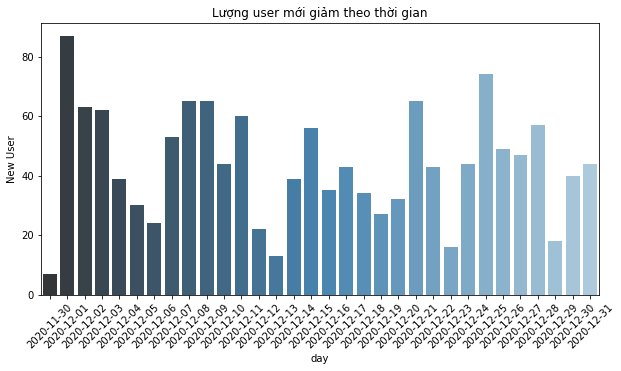

In [6]:
#fig, ax = plt.subplots(figsize = (12,6)
plt.figure(figsize=(10,5))
sns.barplot(x='day',y='New User',data = a,palette="Blues_d")
plt.title('Lượng user mới giảm theo thời gian')
plt.xticks(rotation=45)

## Kiểm tra nguồn traffic nào giảm theo thời gian

In [7]:
datetime.groupby('Referrer URL').count()

,Created,day,Recording URL,Publicly Shared,Already Watched,Favorited,Tags,Notes,Landing Page URL,Exit Page URL,...,Rage Clicked,U-Turned,Incoming Feedback,Net Promoter Score®,Hotjar User ID,New User,Country,Device,Browser,Operating System
Referrer URL,,,,,,,,,,,,,,,,,,,,,
http://m.facebook.com,18,18,18,18,18,18,0,0,18,18,...,18,18,0,0,18,18,18,18,18,18
http://m.facebook.com/,26,26,26,26,26,26,0,0,26,26,...,26,26,0,0,26,26,26,26,26,26
http://vinacorp.vn/ngoi-tai-nha-pha-pha-mo-tai-khoan-voi-vcsc-n120013.html,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://adi.admicro.vn/,29,29,29,29,29,29,0,0,29,29,...,29,29,0,0,29,29,29,29,29,29
https://adi.admicro.vn/adt/cpc/tvcads/2020/11/300x250_thuongnguyenhoai_2020-_16064478404914.html?url=%2F%2Flg1.logging.admicro.vn%2Fcrdu%3Fdmn%3Dhttps%253A%252F%252Fcafef.vn%252F%26rid%3D2ea27aa9-a7ce-406c-a8da-c4fa3a9f4ff1-5fc59a81%26lsn%3D1606785666857%26ce%3D1%26lc%3D5%26cr%3D%26ui%3D%26cmpg%3D1305344%26items%3D567534%26zid%3D515230%26pr%3Dundefined%26cid%3D-1%26sspz%3D1169%26cov%3D1%26re%3Dhttps%253A%252F%252Finvest.vcsc.com.vn%252Fmo-tai-khoan-online%253Futm_source%253D2&admid=adnzone_515230_0_567534&vast=https%3A%2F%2Fsspapi.admicro.vn%2Fssp_request%2Fvideo%3Fu%3Dcafef.vn%252F%26z%3D515230%26p%3D1%26w%3D650%26h%3D300%26%26lsn%3Dc8dc01b396a550c4d91e11a5fbaf6f61%26dgid%3D5373a9eb773ec194200ec72ac0e454e6%26l%3D5%26loc%3D5%26i%3D3212372809457911335%26isdetail%3D0%26pid%3D%26tags%3D5%26adstype%3D%26vtype%3D8%26vid%3D%26bannerid%3D567534,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.youtube.com/watch?v=ZC6mSQbx4cc,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://youtube.com/,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1
https://zingnews.vn,1,1,1,1,1,1,0,0,1,1,...,1,1,0,0,1,1,1,1,1,1


#### Gộp các nguồn link

In [8]:
datetime = datetime.fillna('Direct')

In [9]:
df = datetime

In [10]:
df.loc[df['Referrer URL'].str.contains('google'), 'Referrer URL'] = 'google'
df.loc[df['Referrer URL'].str.contains('facebook'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('zalo'), 'Referrer URL'] = 'zalo'
df.loc[df['Referrer URL'].str.contains('vcsc.com.vn'), 'Referrer URL'] = 'website vcsc'
df.loc[df['Referrer URL'].str.contains('fbclid'), 'Referrer URL'] = 'facebook'
df.loc[df['Referrer URL'].str.contains('fili'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('vinacorp'), 'Referrer URL'] = 'cafef banner'
df.loc[df['Referrer URL'].str.contains('cafef'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('nhipcaudautu'), 'Referrer URL'] = 'nhipcaudautu'
df.loc[df['Referrer URL'].str.contains('youtube'), 'Referrer URL'] = 'youtube'
df.loc[df['Referrer URL'].str.contains('vietstock'), 'Referrer URL'] = 'vietstock'
df.loc[df['Referrer URL'].str.contains('cdn.'), 'Referrer URL'] = 'cafef'
df.loc[df['Referrer URL'].str.contains('linkedin'), 'Referrer URL'] = 'linkedin'
df.loc[df['Referrer URL'].str.contains('admicro'), 'Referrer URL'] = 'cafef banner'
df.loc[df['Referrer URL'].str.contains('coccoc.com'), 'Referrer URL'] = 'Coc Coc'
df.loc[df['Referrer URL'].str.contains('dantri.com.vn'), 'Referrer URL'] = 'Dan Tri'
df.loc[df['Referrer URL'].str.contains('zingnews'), 'Referrer URL'] = 'zingnews'
df.loc[df['Referrer URL'].str.contains('skype'), 'Referrer URL'] = 'Skype'

In [11]:
df1 = []
df1 = pd.DataFrame(df1)
df1['day'] = df['day']
df1['Referrer URL'] = df['Referrer URL']
df1 = df1.set_index('day')
df1 = pd.get_dummies(df1)
df1 = df1.groupby('day').sum()
df2 = df1
df1 = df1.reset_index()

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   day                                           32 non-null     object
 1   Referrer URL_Coc Coc                          32 non-null     uint8 
 2   Referrer URL_Dan Tri                          32 non-null     uint8 
 3   Referrer URL_Direct                           32 non-null     uint8 
 4   Referrer URL_Skype                            32 non-null     uint8 
 5   Referrer URL_cafef                            32 non-null     uint8 
 6   Referrer URL_cafef banner                     32 non-null     uint8 
 7   Referrer URL_facebook                         32 non-null     uint8 
 8   Referrer URL_google                           32 non-null     uint8 
 9   Referrer URL_https://www.cafechungkhoan.com/  32 non-null     uint8 
 10  Refe

In [13]:
df1

,day,Referrer URL_Coc Coc,Referrer URL_Dan Tri,Referrer URL_Direct,Referrer URL_Skype,Referrer URL_cafef,Referrer URL_cafef banner,Referrer URL_facebook,Referrer URL_google,Referrer URL_https://www.cafechungkhoan.com/,Referrer URL_nhipcaudautu,Referrer URL_vietstock,Referrer URL_website vcsc,Referrer URL_youtube,Referrer URL_zalo,Referrer URL_zingnews
0,2020-11-30,0,0,3,0,0,0,0,3,0,0,2,0,0,0,0
1,2020-12-01,0,0,32,0,2,5,1,49,0,0,5,15,1,3,0
2,2020-12-02,0,0,21,0,3,3,1,36,0,0,1,15,1,0,0
3,2020-12-03,0,0,41,0,1,4,3,36,0,1,0,7,0,2,0
4,2020-12-04,0,0,14,0,1,3,0,19,0,0,1,8,1,2,0
5,2020-12-05,0,0,4,0,0,0,2,30,0,0,0,3,0,0,0
6,2020-12-06,0,0,3,0,0,1,0,26,0,0,1,0,0,0,0
7,2020-12-07,0,0,20,0,0,2,2,35,0,0,0,6,0,0,0
8,2020-12-08,0,0,42,0,9,4,3,31,0,0,0,6,1,0,0
9,2020-12-09,0,0,44,0,4,6,1,20,0,0,0,7,0,0,0


In [14]:
df2 = df2.transpose()
df2

day,2020-11-30,2020-12-01,2020-12-02,2020-12-03,2020-12-04,2020-12-05,2020-12-06,2020-12-07,2020-12-08,2020-12-09,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
Referrer URL_Coc Coc,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
Referrer URL_Dan Tri,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Referrer URL_Direct,3,32,21,41,14,4,3,20,42,44,...,15,18,30,47,17,19,32,26,36,14
Referrer URL_Skype,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Referrer URL_cafef,0,2,3,1,1,0,0,0,9,4,...,1,0,0,0,0,0,0,0,1,0
Referrer URL_cafef banner,0,5,3,4,3,0,1,2,4,6,...,0,0,0,0,0,0,0,0,0,0
Referrer URL_facebook,0,1,1,3,0,2,0,2,3,1,...,4,0,1,4,4,2,2,0,4,4
Referrer URL_google,3,49,36,36,19,30,26,35,31,20,...,23,2,26,42,35,32,38,1,11,36
Referrer URL_https://www.cafechungkhoan.com/,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Referrer URL_nhipcaudautu,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

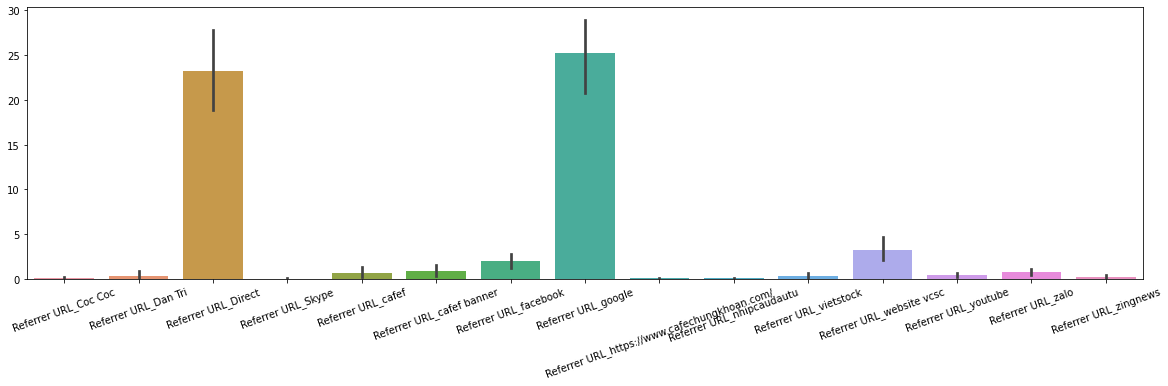

In [15]:
plt.figure(figsize = (20,5))
sns.barplot(data = df1)
plt.xticks(rotation=20)